# Synthetic kimberlitic model

This notebook creates a model simulating a kimberlite with magnetization using the poligonal prisms from fatiando and save its parameters in an outer file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from fatiando import utils

### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Creating the model

In [3]:
model = dict()

In [4]:
# model parameters
model['M'] = 20 # number of vertices per prism
model['L'] = 8 # number of prisms
model['P'] = model['L']*(model['M']+2) # number of parameters

model['z0'] = 0.    # depth of the top the shallowest prism
model['dz'] = 200.    # thickness of each prism

model['inc'] = -50.  # inclination
model['dec'] = 9.   # declination
model['intensity'] = 9. # intensity

model['props']={'magnetization': utils.ang2vec(
    model['intensity'], model['inc'], model['dec'])} # physical property: magnetization

#ri = np.linspace(1000., 200., model['M']*model['L']) # radial distance for each vertice
#rand = np.random.uniform(0.8, 1., model['M']*model['L'])
#r = ri*rand

r = np.zeros(model['M']) + 80.

# Cartesian coordinates of the origin of each prism
x0 = np.zeros(model['L']) 
y0 = np.zeros(model['L'])

l = []   # list of parameters of the prisms

#for i in range(model['L']):
#    l.append([r[model['M']*i:model['M']*(i+1)], x0[i]+100., y0[i]+100.,
#              model['z0'] + model['dz']*i,
#              model['z0'] + model['dz']*(i + 1), model['props']])

for i in range(model['L']):
    l.append([r*(24.-2.*i), x0[i], y0[i], model['z0'] + model['dz']*i,\
          model['z0'] + model['dz']*(i + 1), model['props']])

model['prisms'] = mfun.pol2cart(l, model['M'], model['L'])
model['param_vec'] = mfun.param_vec(l, model['M'], model['L'])

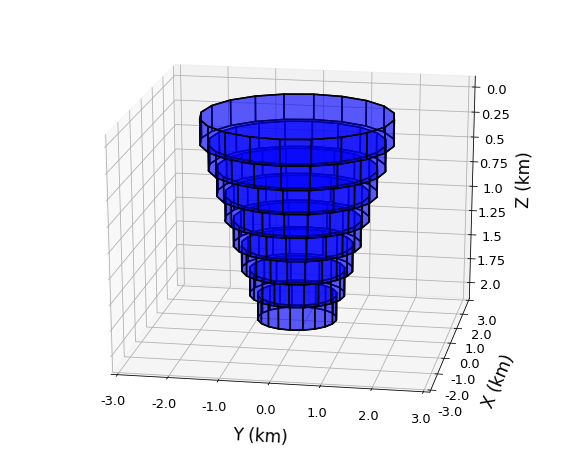

In [7]:
verts = mfun.plot_prisms(model['prisms'])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
alpha=0.4, facecolor='b', linewidths=1.5, edgecolors='k'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(model['prisms'][-1].z2+100, -50, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20
ax.view_init(20, -80)

plt.savefig('data/kimberlite_true.png', dpi=300, bbox_inches="tight")
plt.show()

### Model ploting

### Saving in an outer file

In [6]:
file_name = 'data/model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model, f)